In [1]:
import rdkit.Chem.AllChem as Chem
import json
import pandas as pd
import numpy as np
from mgktools.interpret.interpret import interpret_training_mols, interpret_atoms

/home/xiangyan/apps/miniconda3/envs/mgktools/lib/python3.8/site-packages/graphdot/codegen/sympy_printer.py:4: SymPyDeprecationWarning: 

The sympy.printing.cxxcode submodule is deprecated. It has been renamed to
sympy.printing.cxx.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-printing-code-submodules
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  from sympy.printing.cxxcode import CXX11CodePrinter


In [2]:
df = pd.read_csv('datasets/freesolv.csv')
smiles_to_be_interpret = 'c1ccccc1CCO'
smiles_train = df.smiles
targets_train = df['freesolv']
n_mol = 10
alpha = float(open('freesolv/hyperopt/additive_pnorm/alpha', 'r').readline())
mgk_hyperparameters_file = 'freesolv/hyperopt/additive_pnorm/hyperparameters_0.json'

# Interpretation as the sum of the contribution of the molecules in training set

In [3]:
y_pred, y_std, df_interpret= interpret_training_mols(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    n_mol=10, 
    output_order='sort_by_value', 
    mgk_hyperparameters_file=mgk_hyperparameters_file,
    n_jobs=6)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 642 out of 642 | elapsed:    2.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:    0.0s finished


In [4]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
print(df_interpret)

Prediction: -7.108159 +/- 0.791638

                         smiles_train  contribution_percentage  \
0                       c1ccc(cc1)CCO                 0.431749   
1                      c1ccc(cc1)CCCO                 0.157089   
2                        c1ccc(cc1)CO                 0.127692   
3  c1ccc2c(c1)C(=O)c3cccc(c3C2=O)NCCO                 0.032863   
4                      CCCc1ccc(cc1)O                 0.059868   
5                  CCOC(OCC)Oc1ccccc1                 0.043374   
6     C[C@@H](c1ccc(cc1)CC(C)C)C(=O)O                 0.030130   
7    CN(C)C(=O)c1ccc(cc1)[N+](=O)[O-]                -0.016587   
8                  c1cc(ccc1N)N(=O)=O                 0.019462   
9                       COc1cccc(c1)O                 0.023967   

   contribution_value  
0           -2.931572  
1           -1.087053  
2           -0.845323  
3           -0.466979  
4           -0.311915  
5           -0.226846  
6           -0.210911  
7            0.198214  
8           -0.191112

# Interpretation as the sum of the contribution of atoms

In [5]:
y_pred, y_std, mol = interpret_atoms(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    mgk_hyperparameters_file=mgk_hyperparameters_file)

Prediction: -7.108198 +/- 0.205882



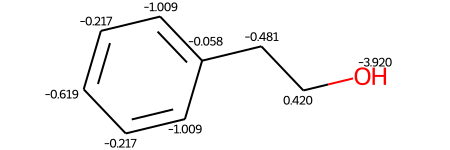

In [6]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
mol